In [7]:
# polynomial regression classification 

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df = pd.read_csv('Social_Network_Ads.csv')

In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.shape

(400, 5)

In [13]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [14]:
x = df.drop(['User ID','Gender','Purchased'],axis=1)

In [15]:
y = df['Purchased']

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr =  LinearRegression()

In [18]:
lr.fit(x,y)

LinearRegression()

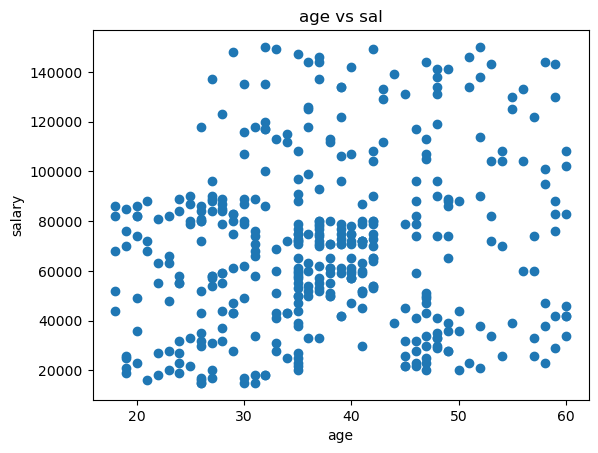

In [19]:
plt.title('age vs sal')
plt.xlabel('age')
plt.ylabel('salary')
plt.scatter(df['Age'],df['EstimatedSalary'])

In [20]:
# cross validation

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [23]:
x_train.shape,x_test.shape

((300, 2), (100, 2))

In [24]:
y_train.shape,y_test.shape

((300,), (100,))

In [25]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [26]:
# feaure scalling => normalizaion

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
x_test_scaled

array([[0.28571429, 0.53333333],
       [0.47619048, 0.25925926],
       [0.4047619 , 0.44444444],
       [0.28571429, 0.47407407],
       [0.4047619 , 0.25925926],
       [0.21428571, 0.03703704],
       [0.30952381, 0.        ],
       [0.42857143, 0.95555556],
       [0.        , 0.39259259],
       [0.69047619, 0.20740741],
       [0.28571429, 0.25185185],
       [0.23809524, 0.2962963 ],
       [0.45238095, 0.2962963 ],
       [0.5       , 0.45925926],
       [0.04761905, 0.52592593],
       [0.33333333, 0.75555556],
       [0.45238095, 0.45925926],
       [0.02380952, 0.51851852],
       [0.88095238, 0.85185185],
       [0.4047619 , 0.05185185],
       [0.4047619 , 0.23703704],
       [0.69047619, 0.95555556],
       [0.54761905, 0.26666667],
       [0.69047619, 0.66666667],
       [0.11904762, 0.0962963 ],
       [0.73809524, 0.93333333],
       [0.23809524, 0.53333333],
       [0.26190476, 0.48148148],
       [0.45238095, 0.34814815],
       [0.33333333, 0.52592593],
       [0.

In [31]:
 x_test_scaled[:,1].min(),x_test_scaled[:,1].max()

(0.0, 1.0)

In [36]:
# build the model 

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log = LogisticRegression()

In [39]:
log.fit(x_train_scaled,y_train)

LogisticRegression()

In [40]:
# evaluate 

In [41]:
y_pred = log.predict(x_test_scaled)

In [42]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [43]:
# create a dataframe 

In [44]:
result = pd.DataFrame({
    'actual':y_test,
    'predict':y_pred
})
result

,actual,predict
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [45]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report,accuracy_score

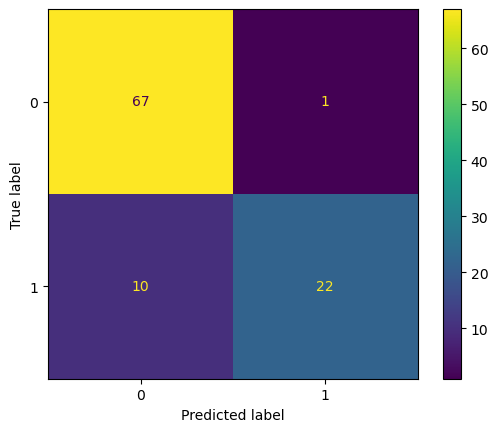

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [48]:
recall = 67/68  # recall
# out of total 0 in data how many model predicted
recall

0.9852941176470589

In [49]:
precision = 67/77  # precision 
# out of 0 predicted by model how many are correct 
precision

0.8701298701298701

In [50]:
(2 * recall * precision) / (recall + precision)
## harmonie mean of precision and recall

0.9241379310344828

In [51]:
# actual accuracy 
accuracy_score(y_test , y_pred )

0.89

In [52]:
# roc_awc

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve

In [54]:
y_pred_prob = log.predict_proba(x_test_scaled)[:,1]

In [55]:
y_pred_prob;

In [56]:
auc = roc_auc_score(y_test,y_pred_prob)

In [57]:
auc

0.9545036764705882

In [58]:
roc_curve(y_test,y_pred_prob)

(array([0.        , 0.        , 0.        , 0.01470588, 0.01470588,
        0.04411765, 0.04411765, 0.05882353, 0.05882353, 0.10294118,
        0.10294118, 0.14705882, 0.14705882, 0.16176471, 0.16176471,
        0.22058824, 0.22058824, 0.41176471, 0.41176471, 0.64705882,
        0.67647059, 1.        ]),
 array([0.     , 0.03125, 0.1875 , 0.1875 , 0.75   , 0.75   , 0.8125 ,
        0.8125 , 0.84375, 0.84375, 0.875  , 0.875  , 0.90625, 0.90625,
        0.9375 , 0.9375 , 0.96875, 0.96875, 1.     , 1.     , 1.     ,
        1.     ]),
 array([       inf, 0.95237859, 0.88667807, 0.87686454, 0.47843811,
        0.45332175, 0.43555642, 0.43519022, 0.41548475, 0.40147195,
        0.39822022, 0.36228151, 0.34812977, 0.34200509, 0.3377789 ,
        0.32409787, 0.30669124, 0.18111912, 0.17989653, 0.09803244,
        0.09684077, 0.0226023 ]))

In [59]:
fpr,tpr,threshold =roc_curve(y_test,y_pred_prob)

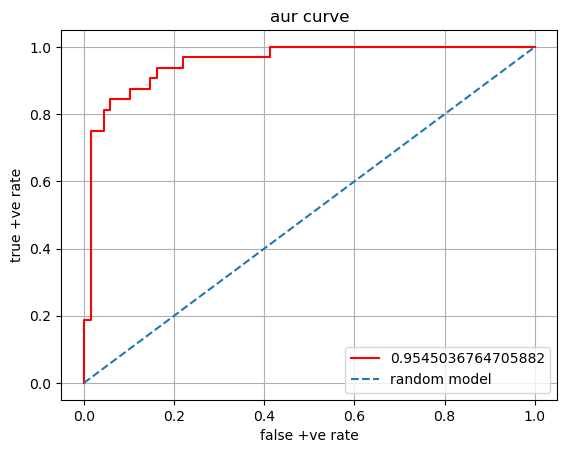

In [60]:
plt.title ('aur curve')
plt.xlabel('false +ve rate')
plt.ylabel('true +ve rate')
plt.plot(fpr,tpr,color = 'red',label = auc)
plt.plot([0,1],[0,1],label='random model',ls ='--')
plt.grid()
plt.legend()

In [61]:
# threshold tuning 

In [62]:
log.predict_proba(x_test_scaled)

array([[0.79205518, 0.20794482],
       [0.75083243, 0.24916757],
       [0.72737903, 0.27262097],
       [0.8157853 , 0.1842147 ],
       [0.81034824, 0.18965176],
       [0.95019789, 0.04980211],
       [0.92937783, 0.07062217],
       [0.39299257, 0.60700743],
       [0.95656654, 0.04343346],
       [0.54667825, 0.45332175],
       [0.88626456, 0.11373544],
       [0.89779251, 0.10220749],
       [0.75496695, 0.24503305],
       [0.61729177, 0.38270823],
       [0.92554954, 0.07445046],
       [0.63168571, 0.36831429],
       [0.67059573, 0.32940427],
       [0.93434893, 0.06565107],
       [0.08449733, 0.91550267],
       [0.87864843, 0.12135157],
       [0.81888088, 0.18111912],
       [0.15248849, 0.84751151],
       [0.67590213, 0.32409787],
       [0.27277339, 0.72722661],
       [0.96315681, 0.03684319],
       [0.13107149, 0.86892851],
       [0.82780786, 0.17219214],
       [0.82999881, 0.17000119],
       [0.72976414, 0.27023586],
       [0.75461566, 0.24538434],
       [0.

In [63]:
y_pred_prob

array([0.20794482, 0.24916757, 0.27262097, 0.1842147 , 0.18965176,
       0.04980211, 0.07062217, 0.60700743, 0.04343346, 0.45332175,
       0.11373544, 0.10220749, 0.24503305, 0.38270823, 0.07445046,
       0.36831429, 0.32940427, 0.06565107, 0.91550267, 0.12135157,
       0.18111912, 0.84751151, 0.32409787, 0.72722661, 0.03684319,
       0.86892851, 0.17219214, 0.17000119, 0.27023586, 0.24538434,
       0.08578865, 0.3377789 , 0.78533287, 0.23813101, 0.07030272,
       0.03249916, 0.08458475, 0.1543954 , 0.09803244, 0.47843811,
       0.15872578, 0.32823773, 0.14892149, 0.11739166, 0.65629525,
       0.09684077, 0.34200509, 0.78246351, 0.05331972, 0.70172328,
       0.92164239, 0.11510851, 0.21074844, 0.41476139, 0.88667807,
       0.34812977, 0.17812399, 0.12621622, 0.44102774, 0.03185349,
       0.08284872, 0.78704123, 0.05598685, 0.39822022, 0.0226023 ,
       0.88889203, 0.11940035, 0.09684077, 0.28358369, 0.43519022,
       0.52052469, 0.28015508, 0.06176414, 0.30669124, 0.16125

In [64]:
threshold = 0.7
y_pred_new = (y_pred_prob > threshold).astype(int)

In [65]:
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])